# Análise preditiva do crescimento frota de veículos  em João Pessoa usando ARIMA

Sobre o dataset:

* Fota de Veículos - IBGE (filtrados para o municícpio de João Pessoa)

* Pesquisa realizada por Ministério dos Transportes, SENATRAN - Secretaria Nacional de Trânsito - 2024

* Número de veículos registrados, por municício, por categoria
* 2006 a 2023

## Importação dos dados e setup do ambiente

In [31]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
veiculos = pd.read_csv("IBGE_frota_jp.csv", delimiter=';')
veiculos.head()

,Nível,Indicador,2006,2007,2008,2009,2010,2011,2012,2013,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unidade
0,1,Veículo,147134.0,164264.0,183771.0,204679.0,230820.0,256381.0,278565.0,298796.0,...,337157.0,355132.0,370096.0,387392.0,404613.0,416052.0,429369.0,440454.0,456413.0,veículos
1,1.1,Tipo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.1.1,Automóvel,100033.0,109320.0,118120.0,128651.0,140792.0,151316.0,162469.0,172667.0,...,189677.0,195416.0,201990.0,209624.0,217923.0,222797.0,226454.0,228445.0,231820.0,veículos
3,1.1.2,Bonde,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,veículos
4,1.1.3,Caminhão,3523.0,3798.0,4033.0,4268.0,4631.0,5031.0,5383.0,5610.0,...,6169.0,6115.0,6054.0,6142.0,6382.0,6490.0,6685.0,6838.0,7061.0,veículos


## Limpeza dos dados

Eliminar linhas vazias ou com valores nulos

In [33]:
veiculos = veiculos.dropna()

Eliminar colunas desnecessárias

In [34]:
veiculos = veiculos.drop(columns=['Unidade','Nível'])
veiculos

,Indicador,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Veículo,147134.0,164264.0,183771.0,204679.0,230820.0,256381.0,278565.0,298796.0,317343.0,337157.0,355132.0,370096.0,387392.0,404613.0,416052.0,429369.0,440454.0,456413.0
2,Automóvel,100033.0,109320.0,118120.0,128651.0,140792.0,151316.0,162469.0,172667.0,181934.0,189677.0,195416.0,201990.0,209624.0,217923.0,222797.0,226454.0,228445.0,231820.0
3,Bonde,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Caminhão,3523.0,3798.0,4033.0,4268.0,4631.0,5031.0,5383.0,5610.0,5991.0,6169.0,6115.0,6054.0,6142.0,6382.0,6490.0,6685.0,6838.0,7061.0
5,Caminhão trator,203.0,228.0,254.0,279.0,315.0,372.0,417.0,453.0,521.0,576.0,583.0,592.0,611.0,658.0,711.0,834.0,856.0,928.0
6,Caminhonete,7507.0,9283.0,12004.0,13225.0,14918.0,16455.0,18168.0,19667.0,21087.0,22117.0,22928.0,23586.0,24654.0,25720.0,26516.0,28051.0,28761.0,30172.0
7,Camioneta,6880.0,6299.0,4786.0,5261.0,5997.0,7033.0,7992.0,9022.0,10206.0,11242.0,12109.0,12866.0,13595.0,14123.0,14406.0,14958.0,15786.0,17226.0
8,Chassi plataforma,30.0,23.0,22.0,15.0,15.0,13.0,12.0,12.0,7.0,7.0,6.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0
9,Ciclomotor,41.0,41.0,41.0,65.0,65.0,65.0,65.0,66.0,66.0,3411.0,7344.0,8019.0,8463.0,8607.0,8992.0,9603.0,10483.0,11258.0
10,Micro-ônibus,515.0,558.0,603.0,677.0,779.0,872.0,944.0,1021.0,1101.0,1143.0,1148.0,1122.0,1130.0,1154.0,1197.0,1194.0,1152.0,1132.0


Eliminar linhas onde todas as colunas possuem valor 0

In [35]:
veiculos_drop_indicador = veiculos.drop(columns = 'Indicador') #unica coluna com valor diferente de 0
linhas_nulas = veiculos_drop_indicador.loc[(veiculos_drop_indicador == 0).all(axis=1)] #localizar as linhas onde os valores em todas as colunas é 0
indices_linhas_nulas = list(linhas_nulas.index) #guardar somente o index dessas linhas

for i in indices_linhas_nulas:
    veiculos = veiculos.drop(i) #excluir no df principal as linhas de index correspondente

veiculos = veiculos.reset_index(drop=True)
veiculos

,Indicador,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Veículo,147134.0,164264.0,183771.0,204679.0,230820.0,256381.0,278565.0,298796.0,317343.0,337157.0,355132.0,370096.0,387392.0,404613.0,416052.0,429369.0,440454.0,456413.0
1,Automóvel,100033.0,109320.0,118120.0,128651.0,140792.0,151316.0,162469.0,172667.0,181934.0,189677.0,195416.0,201990.0,209624.0,217923.0,222797.0,226454.0,228445.0,231820.0
2,Caminhão,3523.0,3798.0,4033.0,4268.0,4631.0,5031.0,5383.0,5610.0,5991.0,6169.0,6115.0,6054.0,6142.0,6382.0,6490.0,6685.0,6838.0,7061.0
3,Caminhão trator,203.0,228.0,254.0,279.0,315.0,372.0,417.0,453.0,521.0,576.0,583.0,592.0,611.0,658.0,711.0,834.0,856.0,928.0
4,Caminhonete,7507.0,9283.0,12004.0,13225.0,14918.0,16455.0,18168.0,19667.0,21087.0,22117.0,22928.0,23586.0,24654.0,25720.0,26516.0,28051.0,28761.0,30172.0
5,Camioneta,6880.0,6299.0,4786.0,5261.0,5997.0,7033.0,7992.0,9022.0,10206.0,11242.0,12109.0,12866.0,13595.0,14123.0,14406.0,14958.0,15786.0,17226.0
6,Chassi plataforma,30.0,23.0,22.0,15.0,15.0,13.0,12.0,12.0,7.0,7.0,6.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0
7,Ciclomotor,41.0,41.0,41.0,65.0,65.0,65.0,65.0,66.0,66.0,3411.0,7344.0,8019.0,8463.0,8607.0,8992.0,9603.0,10483.0,11258.0
8,Micro-ônibus,515.0,558.0,603.0,677.0,779.0,872.0,944.0,1021.0,1101.0,1143.0,1148.0,1122.0,1130.0,1154.0,1197.0,1194.0,1152.0,1132.0
9,Motocicleta,24394.0,29871.0,37902.0,45146.0,54778.0,65218.0,71717.0,77126.0,82004.0,87231.0,92835.0,97900.0,103803.0,109064.0,112251.0,116591.0,120924.0,126733.0


### Extrair a série temporal principal (soma de todos os veículos)

In [36]:
st_veiculos = veiculos[veiculos['Indicador'] == 'Veículo']
veiculos_index = st_veiculos.index
st_veiculos = st_veiculos.drop(columns = ['Indicador'])

veiculos = veiculos.drop(st_veiculos.index)
veiculos = veiculos.reset_index(drop=True)
st_veiculos

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,147134.0,164264.0,183771.0,204679.0,230820.0,256381.0,278565.0,298796.0,317343.0,337157.0,355132.0,370096.0,387392.0,404613.0,416052.0,429369.0,440454.0,456413.0


Alterar a formatação

In [37]:
anos = list(st_veiculos.keys())
valores = st_veiculos.values.flatten()

st_veiculos = pd.DataFrame({
    'Ano': anos, 
    'Veículos': valores
})

st_veiculos

,Ano,Veículos
0,2006,147134.0
1,2007,164264.0
2,2008,183771.0
3,2009,204679.0
4,2010,230820.0
5,2011,256381.0
6,2012,278565.0
7,2013,298796.0
8,2014,317343.0
9,2015,337157.0


Visualizar

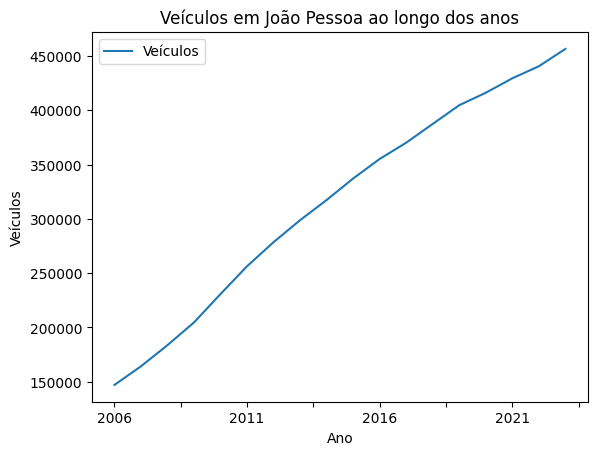

In [38]:
st_veiculos.plot(x='Ano', y='Veículos', kind='line', title='Veículos em João Pessoa ao longo dos anos')
plt.xlabel('Ano')
plt.ylabel('Veículos')
plt.show()

### Agrupar os tipos de veiculos

#### Carros

Isolando as colunas relevantes

In [39]:
carros = veiculos[(veiculos['Indicador'] == 'Automóvel') |
                (veiculos['Indicador'] == 'Caminhonete') |
                (veiculos['Indicador'] == 'Camioneta') |
                (veiculos['Indicador'] == 'Utilitário')]
carros

,Indicador,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Automóvel,100033.0,109320.0,118120.0,128651.0,140792.0,151316.0,162469.0,172667.0,181934.0,189677.0,195416.0,201990.0,209624.0,217923.0,222797.0,226454.0,228445.0,231820.0
3,Caminhonete,7507.0,9283.0,12004.0,13225.0,14918.0,16455.0,18168.0,19667.0,21087.0,22117.0,22928.0,23586.0,24654.0,25720.0,26516.0,28051.0,28761.0,30172.0
4,Camioneta,6880.0,6299.0,4786.0,5261.0,5997.0,7033.0,7992.0,9022.0,10206.0,11242.0,12109.0,12866.0,13595.0,14123.0,14406.0,14958.0,15786.0,17226.0
16,Utilitário,510.0,826.0,1206.0,1680.0,2132.0,2654.0,3098.0,3602.0,4159.0,4579.0,5124.0,5775.0,6643.0,7467.0,8301.0,9675.0,10549.0,11363.0


Somando as colunas 

In [40]:
carros_total = carros.sum().to_frame().T
carros_total

,Indicador,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,AutomóvelCaminhoneteCamionetaUtilitário,114930.0,125728.0,136116.0,148817.0,163839.0,177458.0,191727.0,204958.0,217386.0,227615.0,235577.0,244217.0,254516.0,265233.0,272020.0,279138.0,283541.0,290581.0


Atualizando o rótulo

In [41]:
carros_total.at[0,'Indicador'] = 'Carros'
carros_total

,Indicador,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Carros,114930.0,125728.0,136116.0,148817.0,163839.0,177458.0,191727.0,204958.0,217386.0,227615.0,235577.0,244217.0,254516.0,265233.0,272020.0,279138.0,283541.0,290581.0


#### Motos

Isolando as colunas relevantes

In [42]:
motos = veiculos[(veiculos['Indicador'] == 'Ciclomotor') |
                (veiculos['Indicador'] == 'Motocicleta') |
                (veiculos['Indicador'] == 'Motoneta') |
                (veiculos['Indicador'] == 'Sidecar')]
motos

,Indicador,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
6,Ciclomotor,41.0,41.0,41.0,65.0,65.0,65.0,65.0,66.0,66.0,3411.0,7344.0,8019.0,8463.0,8607.0,8992.0,9603.0,10483.0,11258.0
8,Motocicleta,24394.0,29871.0,37902.0,45146.0,54778.0,65218.0,71717.0,77126.0,82004.0,87231.0,92835.0,97900.0,103803.0,109064.0,112251.0,116591.0,120924.0,126733.0
9,Motoneta,1422.0,1833.0,2410.0,2823.0,3264.0,3700.0,4046.0,4392.0,4698.0,5101.0,5370.0,5670.0,6052.0,6617.0,7107.0,7708.0,8568.0,10064.0
13,Sidecar,14.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,16.0


Somando as colunas 

In [43]:
motos_total = motos.sum().to_frame().T
motos_total

,Indicador,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,CiclomotorMotocicletaMotonetaSidecar,25871.0,31760.0,40368.0,48049.0,58122.0,68998.0,75843.0,81599.0,86783.0,95758.0,105564.0,111604.0,118333.0,124303.0,128365.0,133917.0,139990.0,148071.0


Atualizando o rótulo

In [44]:
motos_total.at[0,'Indicador'] = 'Motos'
motos_total

,Indicador,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Motos,25871.0,31760.0,40368.0,48049.0,58122.0,68998.0,75843.0,81599.0,86783.0,95758.0,105564.0,111604.0,118333.0,124303.0,128365.0,133917.0,139990.0,148071.0


#### Ônibus

Isolando as colunas relevantes

In [45]:
onibus = veiculos[(veiculos['Indicador'] == 'Ônibus') |
                (veiculos['Indicador'] == 'Micro-ônibus')]
onibus

,Indicador,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
7,Micro-ônibus,515.0,558.0,603.0,677.0,779.0,872.0,944.0,1021.0,1101.0,1143.0,1148.0,1122.0,1130.0,1154.0,1197.0,1194.0,1152.0,1132.0
10,Ônibus,912.0,916.0,977.0,1018.0,1312.0,1538.0,1733.0,2315.0,2412.0,2404.0,2343.0,2478.0,2430.0,2382.0,2439.0,2435.0,2654.0,2812.0


Somando as colunas 

In [46]:
onibus_total = onibus.sum().to_frame().T
onibus_total

,Indicador,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Micro-ônibusÔnibus,1427.0,1474.0,1580.0,1695.0,2091.0,2410.0,2677.0,3336.0,3513.0,3547.0,3491.0,3600.0,3560.0,3536.0,3636.0,3629.0,3806.0,3944.0


Atualizando o rótulo

In [47]:
onibus_total.at[0, 'Indicador'] = 'Ônibus'
onibus_total

,Indicador,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Ônibus,1427.0,1474.0,1580.0,1695.0,2091.0,2410.0,2677.0,3336.0,3513.0,3547.0,3491.0,3600.0,3560.0,3536.0,3636.0,3629.0,3806.0,3944.0


#### Outros

Isolando as colunas relevantes

In [48]:
# Juntar as categorias que já foram tratadas
ja_foram = [carros['Indicador'], motos['Indicador'], onibus['Indicador']] #isso é uma lista de listas
ja_foram = [item for sublista in ja_foram for item in sublista] #achatar a lista

# Criar df com as que sobraram
outros = pd.DataFrame()
for i in veiculos['Indicador']:
    if i not in ja_foram:
        nova_linha = veiculos[veiculos['Indicador']==i]
        outros = pd.concat([outros, nova_linha], ignore_index=True)
outros

,Indicador,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Caminhão,3523.0,3798.0,4033.0,4268.0,4631.0,5031.0,5383.0,5610.0,5991.0,6169.0,6115.0,6054.0,6142.0,6382.0,6490.0,6685.0,6838.0,7061.0
1,Caminhão trator,203.0,228.0,254.0,279.0,315.0,372.0,417.0,453.0,521.0,576.0,583.0,592.0,611.0,658.0,711.0,834.0,856.0,928.0
2,Chassi plataforma,30.0,23.0,22.0,15.0,15.0,13.0,12.0,12.0,7.0,7.0,6.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0
3,Reboque,632.0,688.0,779.0,887.0,1237.0,1373.0,1538.0,1742.0,1874.0,2049.0,2238.0,2438.0,2634.0,2878.0,3170.0,3406.0,3598.0,3888.0
4,Semi-reboque,480.0,522.0,562.0,609.0,496.0,629.0,855.0,961.0,1130.0,1279.0,1387.0,1423.0,1421.0,1446.0,1476.0,1551.0,1597.0,1697.0
5,Trator de rodas,14.0,15.0,15.0,15.0,17.0,17.0,17.0,17.0,17.0,17.0,18.0,18.0,18.0,18.0,18.0,19.0,19.0,19.0
6,Triciclo,6.0,11.0,25.0,28.0,40.0,59.0,73.0,83.0,92.0,109.0,118.0,113.0,117.0,118.0,118.0,128.0,127.0,133.0
7,Outros,18.0,17.0,17.0,17.0,17.0,21.0,23.0,25.0,29.0,31.0,35.0,33.0,36.0,38.0,45.0,59.0,79.0,88.0


Somando as colunas 

In [49]:
outros_total = outros.sum().to_frame().T
outros_total

,Indicador,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,CaminhãoCaminhão tratorChassi plataformaReboqu...,4906.0,5302.0,5707.0,6118.0,6768.0,7515.0,8318.0,8903.0,9661.0,10237.0,10500.0,10675.0,10983.0,11541.0,12031.0,12685.0,13117.0,13817.0


Atualizando o rótulo

In [50]:
outros_total.at[0, 'Indicador'] = 'Outros'
outros_total

,Indicador,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Outros,4906.0,5302.0,5707.0,6118.0,6768.0,7515.0,8318.0,8903.0,9661.0,10237.0,10500.0,10675.0,10983.0,11541.0,12031.0,12685.0,13117.0,13817.0


#### Juntando tudo

In [51]:
#Criar a coluna anos
Anos = list(veiculos.keys())
Anos.pop(0) #tirar indicador da lista
st_tipos_veiculos = pd.DataFrame({'Ano': Anos})

#Criar uma coluna para cada categoria
categorias = [carros_total, motos_total, onibus_total, outros_total]

for i in categorias:
    i_rotulo = i.loc[0, 'Indicador']
    i_valores = i.drop(columns = ['Indicador'])
    i_valores = i_valores.values.flatten()

    #adiconar no df
    st_tipos_veiculos[i_rotulo] = i_valores

st_tipos_veiculos['Total'] = st_veiculos['Veículos']

#### Visualização dos Dados

In [52]:
st_tipos_veiculos

,Ano,Carros,Motos,Ônibus,Outros,Total
0,2006,114930.0,25871.0,1427.0,4906.0,147134.0
1,2007,125728.0,31760.0,1474.0,5302.0,164264.0
2,2008,136116.0,40368.0,1580.0,5707.0,183771.0
3,2009,148817.0,48049.0,1695.0,6118.0,204679.0
4,2010,163839.0,58122.0,2091.0,6768.0,230820.0
5,2011,177458.0,68998.0,2410.0,7515.0,256381.0
6,2012,191727.0,75843.0,2677.0,8318.0,278565.0
7,2013,204958.0,81599.0,3336.0,8903.0,298796.0
8,2014,217386.0,86783.0,3513.0,9661.0,317343.0
9,2015,227615.0,95758.0,3547.0,10237.0,337157.0


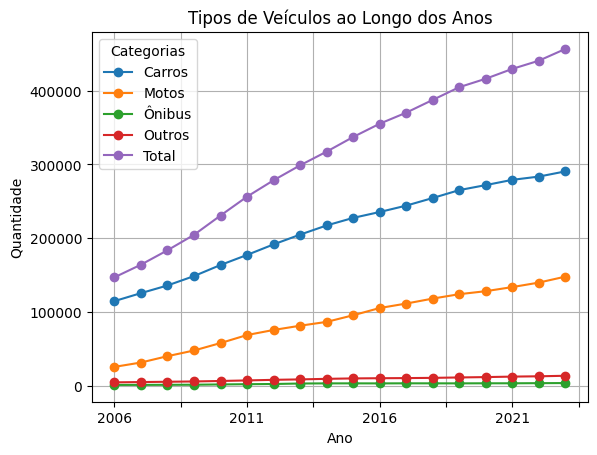

In [53]:
st_tipos_veiculos.plot(x='Ano', y=st_tipos_veiculos.columns[1:], kind='line', marker='o')

# Personalizar o gráfico
plt.title('Tipos de Veículos ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.grid(True)  # Adicionar grade
plt.legend(title='Categorias')  # Adicionar legenda
plt.show()

## Testes de Viabilidade

In [ ]:
data = st_veiculos

### Estacionariedade

Garante que a série tem propriedades estatísticas constantes, ou seja, os dados variam em padroẽs constantes

**Teste ADF (Augmented Dickey-Fuller)**:  verifica a presença de raiz unitária (não estacionariedade)  
  
Hipótese nula: A série não é estacionária  
  
Se o p-valor for menor que 0,05, rejeita-se a hipótese nula (a série é estacionária)

In [55]:
from statsmodels.tsa.stattools import adfuller


In [135]:
result = adfuller(data['Veículos'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Valores críticos:', result[4])

ADF Statistic: -2.358383535335577
p-value: 0.15382837636198737
Valores críticos: {'1%': -4.223238279489106, '5%': -3.189368925619835, '10%': -2.729839421487603}


Observa-se que a série passou no teste e, portanto tem grande probabilidade de ser estacionária

### Autocorrelação

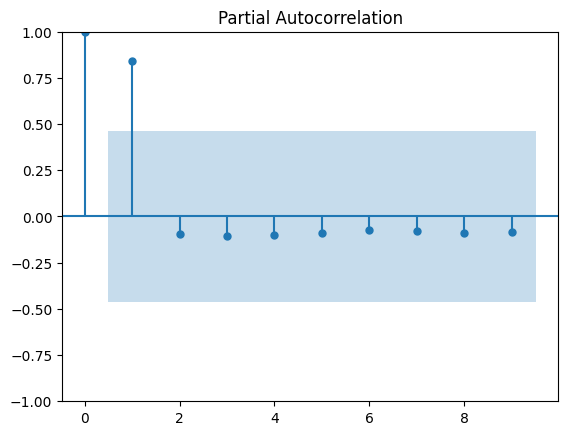

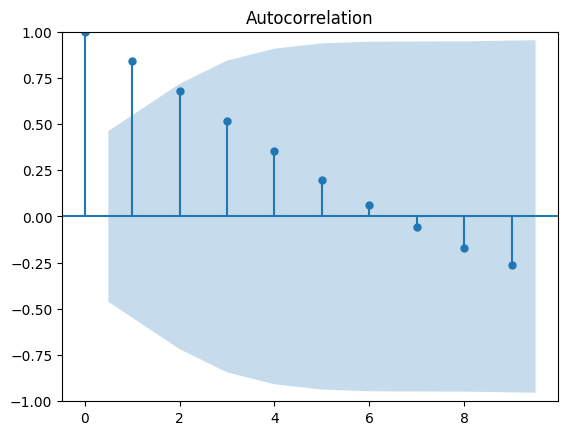

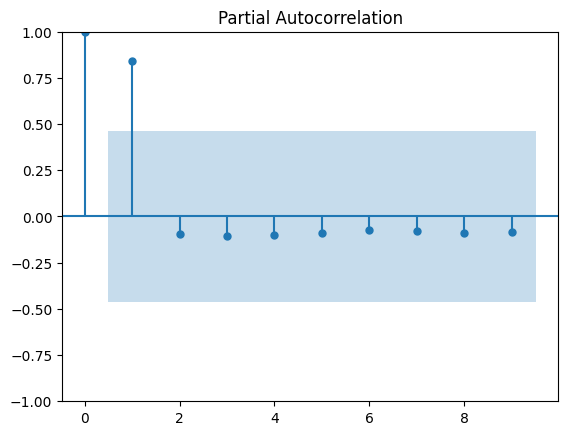

In [57]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data['Veículos'])
plot_pacf(data['Veículos'])

Interpretação dos gráficos  
  
* **Autocorrelação:** observa-se uma variação constante e gradual, o que indica uma correlação de longo termo entre os valores da série  
* **Autocorrelação Parcial:** obseva-se uma variação brusca entre os lags 1 e 2, o que é um bom indicador de média móvel MA(q), com q=1

## Aplicação do modelo

In [ ]:
from statsmodels.tsa.arima.model import ARIMA 

Divisão dos dados entre teste e treinamento

In [60]:
train_size = int(len(data) * 0.8)  # 80% para treino, 20% para teste
train, test = data[:train_size], data[train_size:]

Aplicar o modelo

In [121]:
#Ajustar modelo ARIMA
model = ARIMA(train['Veículos'], order=(6,0, 1))  # ARIMA(1, 1, 1)
results = model.fit()

/home/rhuan/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/rhuan/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [122]:
# Resumo do modelo
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:               Veículos   No. Observations:                   14
Model:                 ARIMA(6, 0, 1)   Log Likelihood                -132.096
Date:                Wed, 19 Mar 2025   AIC                            282.191
Time:                        09:36:07   BIC                            287.943
Sample:                             0   HQIC                           281.659
                                 - 14                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.812e+05   7.37e+04      3.816      0.000    1.37e+05    4.26e+05
ar.L1          1.6881      0.425      3.971      0.000       0.855       2.521
ar.L2         -0.8339      0.904     -0.923      0.3

### Avaliação dos Resíduos

Os resíduos (erros) do modelo devem se comportar como ruído branco (média zero, variância constante e sem autocorrelação)

In [123]:
residuals = results.resid

#### Distribuição dos Resíduos:

Histograma dos resíduos

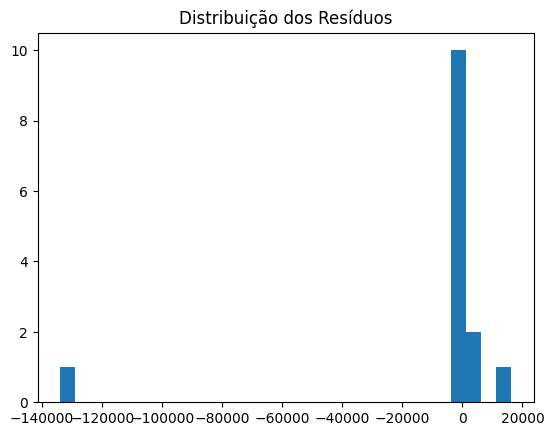

In [124]:
plt.hist(residuals, bins=30)
plt.title('Distribuição dos Resíduos')
plt.show()

Observa-se que os resíduos estão centralizados em 0.

Teste Jarque-Bera

In [125]:
from statsmodels.stats.stattools import jarque_bera
jb_test = jarque_bera(residuals)
print(f"Jarque-Bera Test: Statistic={jb_test[0]}, p-value={jb_test[1]}")

Jarque-Bera Test: Statistic=68.44234806732291, p-value=1.3738298646093915e-15


O p-value é maior dos que 0,05, o que indica que os resíduos são normais

#### Autocorrelação dos Resíduos:

A autocorrelação dos resíduos indica que o modelo deixou de capturar padrões importantes nos dados.

Gráfico de ACF dos resíduos

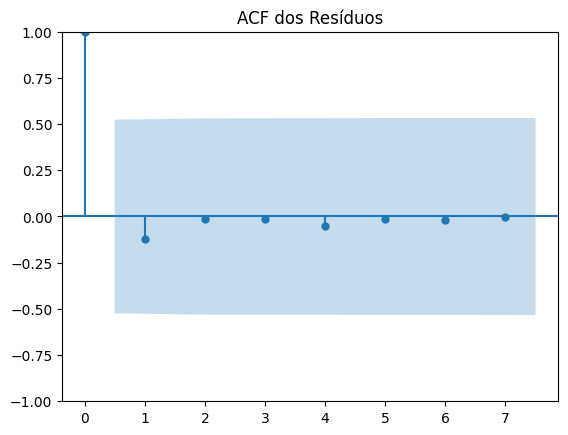

In [126]:
plot_acf(residuals)
plt.title('ACF dos Resíduos')
plt.show()

O modelo não capturou completamente a dependencia temporal entro o primeiro e os lags 0 e 1

Teste de Ljung-Box

In [127]:
from statsmodels.stats.diagnostic import acorr_ljungbox
lb_test = acorr_ljungbox(residuals)
print(f"Ljung-Box Test: results= \n{lb_test}")

Ljung-Box Test: results= 
    lb_stat  lb_pvalue
1  0.251558   0.615980
2  0.256362   0.879694


Os p-values são maiores do que 0.05, portanto, não há correlação entre os resíduos.

### Previsões

In [128]:
forecast = results.forecast(steps=len(test))

In [129]:
#forecast = np.array(results.forecast(steps=10))
#print(forecast)

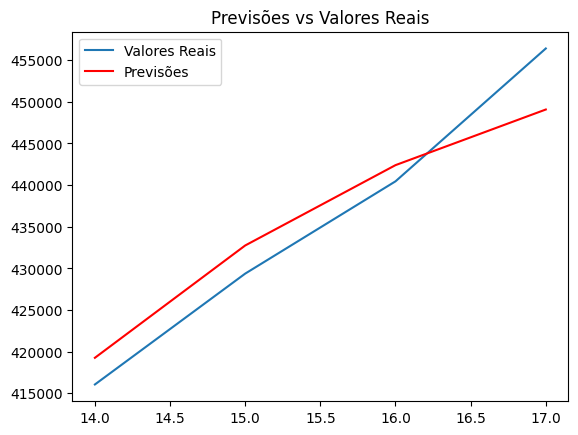

In [130]:
# Plotar previsões vs valores reais
plt.plot(test.index, test['Veículos'], label='Valores Reais')
plt.plot(test.index, forecast, label='Previsões', color='red')
plt.legend()
plt.title('Previsões vs Valores Reais')
plt.show()

In [131]:
comparacao = pd.DataFrame({ 'Ano:' : test['Ano'], 'N Veículos Real': test['Veículos'], 'N Veículos Precição': np.array(forecast)})
comparacao

,Ano:,N Veículos Real,N Veículos Precição
14,2020,416052.0,419256.637945
15,2021,429369.0,432748.836336
16,2022,440454.0,442399.143136
17,2023,456413.0,449081.726075


### Métricas de erro

In [132]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = np.sqrt(mean_squared_error(test['Veículos'], forecast))
mae = mean_absolute_error(test['Veículos'], forecast)
mape = np.mean(np.abs((test['Veículos'] - forecast) / test['Veículos'])) * 100

print(f"RMSE (Root Mean Squared Error): {rmse}")
print(f"MAE (Mean Absolute Error): {mae}")
print(f"MAPE (Mean Absolute Percentage Error): {mape}%")

RMSE (Root Mean Squared Error): 4450.3976564039995
MAE (Mean Absolute Error): 3965.2228355867846
MAPE (Mean Absolute Percentage Error): 0.9013289889782946%


## Previsão para os próximos 10 anos

KeyError: "None of [Index(['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',\n       '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023'],\n      dtype='object')] are in the [columns]"

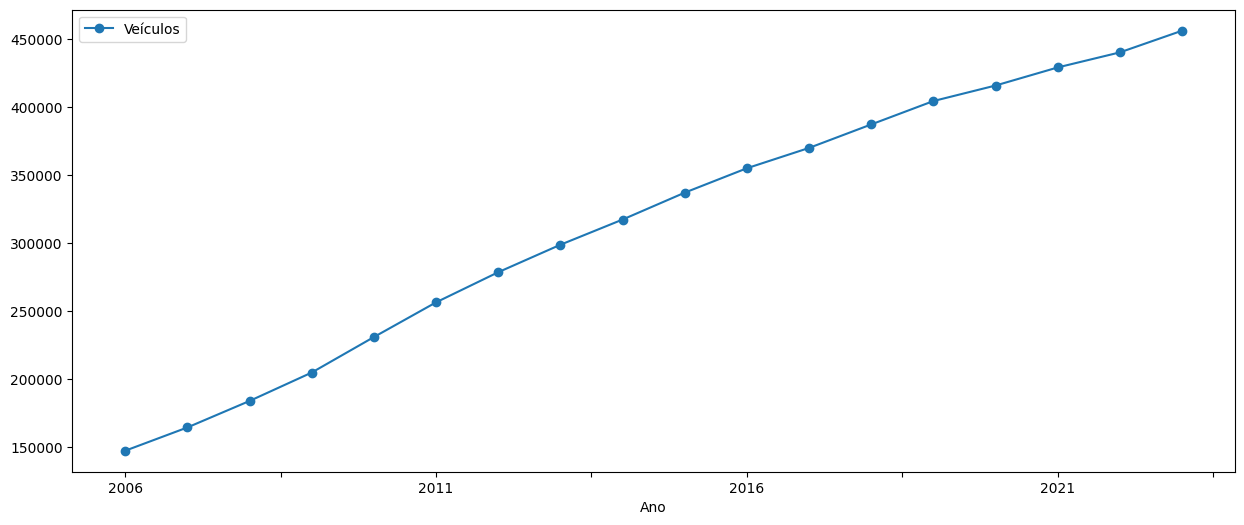

In [137]:
data.plot(x='Ano', y='Veículos', kind='line', marker='o', linestyle='-', figsize=(15, 6))
data.plot(data['Ano'], data['Veículos'], marker='s', linestyle='--', label='Veículos')
data.plot(previsoes ['Ano'], previsoes['Veículos'], marker='^', linestyle='--', label='Predições')